In [1]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../")

import nidn

01:44:48|NIDN-INFO| Initialized NIDN for cpu
01:44:48|NIDN-INFO| Using double precision


Physical wavelengths are (in meters):
[7.00000000e-07 6.83464567e-07 6.67692308e-07 6.52631579e-07
 6.38235294e-07 6.24460432e-07 6.11267606e-07 5.98620690e-07
 5.86486486e-07 5.74834437e-07 5.63636364e-07 5.52866242e-07
 5.42500000e-07 5.32515337e-07 5.22891566e-07 5.13609467e-07
 5.04651163e-07 4.96000000e-07 4.87640449e-07 4.79558011e-07
 4.71739130e-07 4.64171123e-07 4.56842105e-07 4.49740933e-07
 4.42857143e-07 4.36180905e-07 4.29702970e-07 4.23414634e-07
 4.17307692e-07 4.11374408e-07 4.05607477e-07 4.00000000e-07]


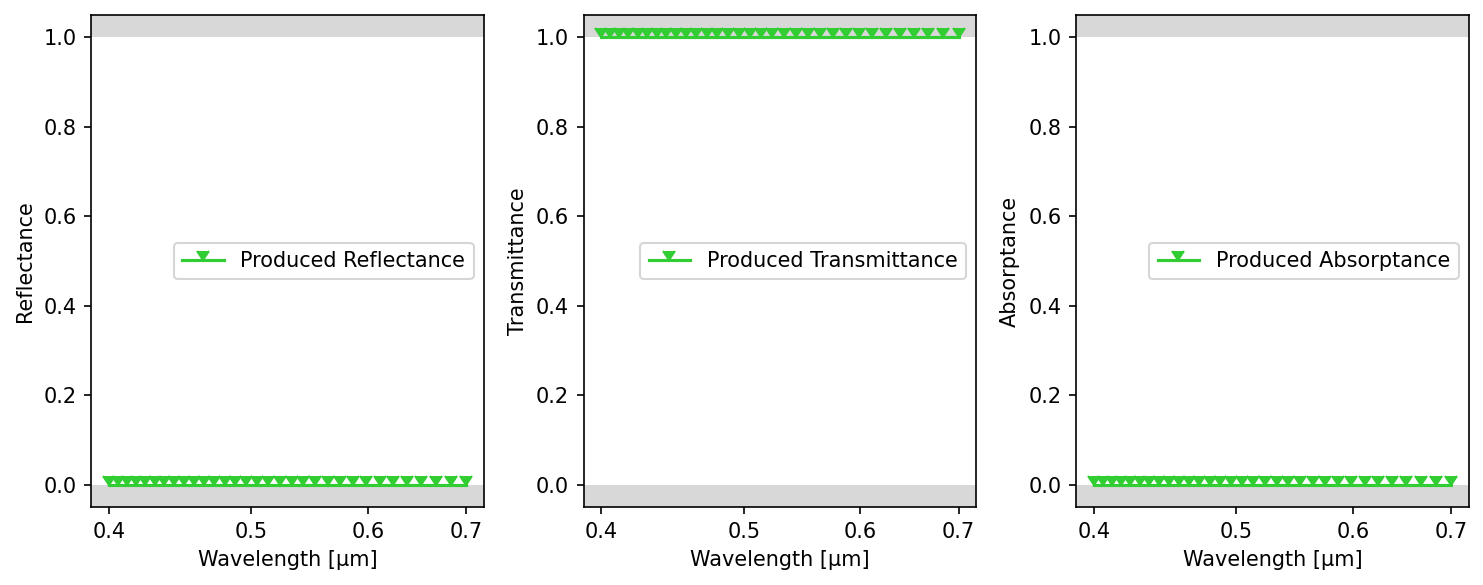

In [17]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 0.4e-6
cfg.physical_wavelength_range[1] = 0.7e-6
cfg.TRCWA_PER_LAYER_THICKNESS = [0.1]
cfg.TRCWA_BOTTOM_LAYER_EPS = 16.0
cfg.TRCWA_L_grid = [[1.0,0.],[0.,1.0]] 

# Let's investigate 32 frequency points
cfg.N_freq = 32

# Currently, the target spectra is set manually as a list of numbers 
cfg.target_reflectance_spectrum =   32*[0.0]
cfg.target_transmittance_spectrum = 32*[1.0]
# Since R + T + A = 1, we only need to give the reflectance and transmittance (absorptance is implicit)

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_wls, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical wavelengths are (in meters):")
print(physical_wls)

In [18]:
cfg.pop("model",None); # Forget the old model
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 8 # Choose number of layers

# Allowed range of epsilon values
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 3.0

cfg.type = "regression" # Choose type as described above
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [19]:
#Show all used settings
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 0              |seed                   : 100            |
model_type             : siren          |iterations             : 1000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : 0.0            |real_max_eps           : 20.0           |imag_min_eps           : 0.0            |
imag_max_eps           : 3.0            |Nx                     : 1              |Ny                     : 1              |
N_layers

In [20]:
nidn.run_training(cfg);

02:05:54|NIDN-INFO| ###  New Best=0.6484 with SpectrumLoss=0.6484 ### L1=0.6484
02:05:54|NIDN-INFO| It=0     Loss=0.6484   |  weighted_avg=0.6484  |  SpectrumLoss=0.6484 | L1=0.6484
02:05:55|NIDN-INFO| ###  New Best=0.6121 with SpectrumLoss=0.6121 ### L1=0.6121
02:05:55|NIDN-INFO| ###  New Best=0.6022 with SpectrumLoss=0.6022 ### L1=0.6022
02:05:56|NIDN-INFO| ###  New Best=0.5894 with SpectrumLoss=0.5894 ### L1=0.5894
02:05:57|NIDN-INFO| ###  New Best=0.5752 with SpectrumLoss=0.5752 ### L1=0.5752
02:05:57|NIDN-INFO| ###  New Best=0.5639 with SpectrumLoss=0.5639 ### L1=0.5639
02:05:57|NIDN-INFO| It=5     Loss=0.5639   |  weighted_avg=0.5985  |  SpectrumLoss=0.5639 | L1=0.5639
02:05:58|NIDN-INFO| ###  New Best=0.5573 with SpectrumLoss=0.5573 ### L1=0.5573
02:05:59|NIDN-INFO| ###  New Best=0.5495 with SpectrumLoss=0.5495 ### L1=0.5495
02:06:00|NIDN-INFO| ###  New Best=0.5424 with SpectrumLoss=0.5424 ### L1=0.5424
02:06:01|NIDN-INFO| ###  New Best=0.5375 with SpectrumLoss=0.5375 ### L1=0.5

02:06:38|NIDN-INFO| ###  New Best=0.1886 with SpectrumLoss=0.1886 ### L1=0.1886
02:06:39|NIDN-INFO| ###  New Best=0.1862 with SpectrumLoss=0.1862 ### L1=0.1862
02:06:40|NIDN-INFO| ###  New Best=0.1734 with SpectrumLoss=0.1734 ### L1=0.1734
02:06:40|NIDN-INFO| It=65    Loss=0.1734   |  weighted_avg=0.2598  |  SpectrumLoss=0.1734 | L1=0.1734
02:06:40|NIDN-INFO| ###  New Best=0.1712 with SpectrumLoss=0.1712 ### L1=0.1712
02:06:41|NIDN-INFO| ###  New Best=0.1598 with SpectrumLoss=0.1598 ### L1=0.1598
02:06:42|NIDN-INFO| ###  New Best=0.1565 with SpectrumLoss=0.1565 ### L1=0.1565
02:06:42|NIDN-INFO| ###  New Best=0.1469 with SpectrumLoss=0.1469 ### L1=0.1469
02:06:43|NIDN-INFO| ###  New Best=0.1438 with SpectrumLoss=0.1438 ### L1=0.1438
02:06:43|NIDN-INFO| It=70    Loss=0.1438   |  weighted_avg=0.2164  |  SpectrumLoss=0.1438 | L1=0.1438
02:06:44|NIDN-INFO| ###  New Best=0.1351 with SpectrumLoss=0.1351 ### L1=0.1351
02:06:45|NIDN-INFO| ###  New Best=0.1315 with SpectrumLoss=0.1315 ### L1=0.1

02:07:33|NIDN-INFO| ###  New Best=0.0256 with SpectrumLoss=0.0256 ### L1=0.0256
02:07:34|NIDN-INFO| ###  New Best=0.0251 with SpectrumLoss=0.0251 ### L1=0.0251
02:07:35|NIDN-INFO| ###  New Best=0.0246 with SpectrumLoss=0.0246 ### L1=0.0246
02:07:35|NIDN-INFO| It=145   Loss=0.0246   |  weighted_avg=0.0284  |  SpectrumLoss=0.0246 | L1=0.0246
02:07:36|NIDN-INFO| ###  New Best=0.0244 with SpectrumLoss=0.0244 ### L1=0.0244
02:07:36|NIDN-INFO| ###  New Best=0.0240 with SpectrumLoss=0.0240 ### L1=0.0240
02:07:37|NIDN-INFO| ###  New Best=0.0238 with SpectrumLoss=0.0238 ### L1=0.0238
02:07:38|NIDN-INFO| ###  New Best=0.0236 with SpectrumLoss=0.0236 ### L1=0.0236
02:07:38|NIDN-INFO| ###  New Best=0.0234 with SpectrumLoss=0.0234 ### L1=0.0234
02:07:38|NIDN-INFO| It=150   Loss=0.0234   |  weighted_avg=0.0264  |  SpectrumLoss=0.0234 | L1=0.0234
02:07:39|NIDN-INFO| ###  New Best=0.0233 with SpectrumLoss=0.0233 ### L1=0.0233
02:07:42|NIDN-INFO| It=155   Loss=0.0247   |  weighted_avg=0.0251  |  Spectr

KeyboardInterrupt: 

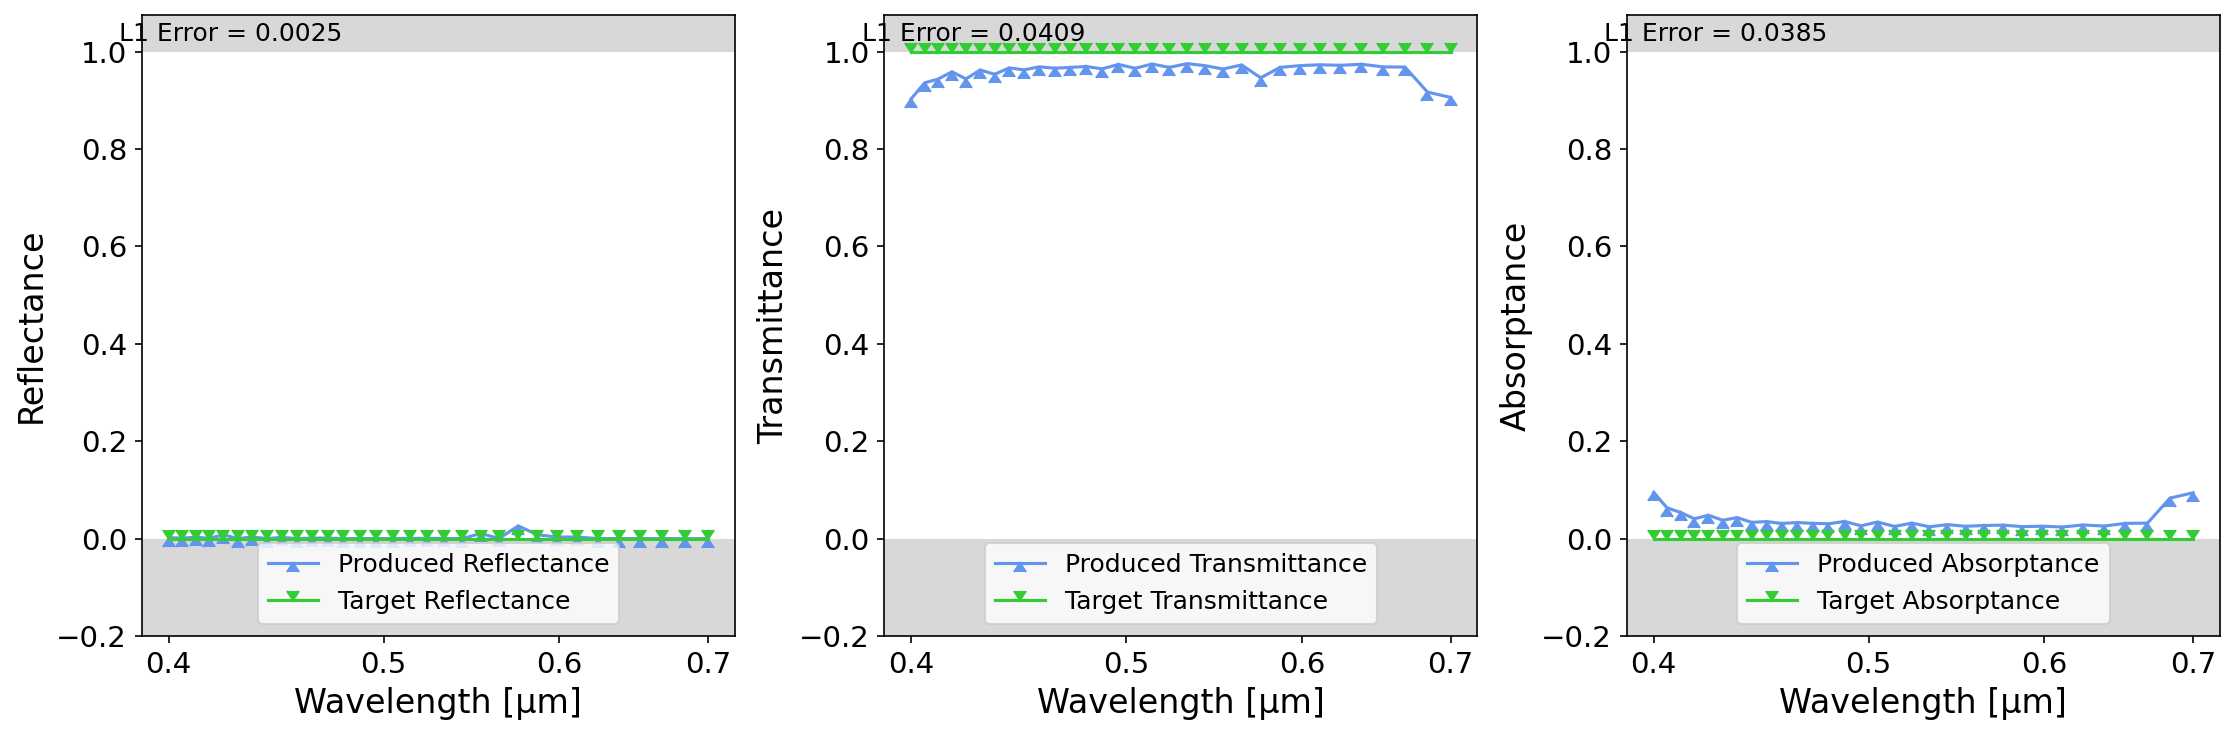

In [21]:
nidn.plot_spectra(cfg)

#### Absolute grid values plot

The complex absolute value of the epsilon over all frequencies is presented here. This plot is in general more useful for patterned multilayers.

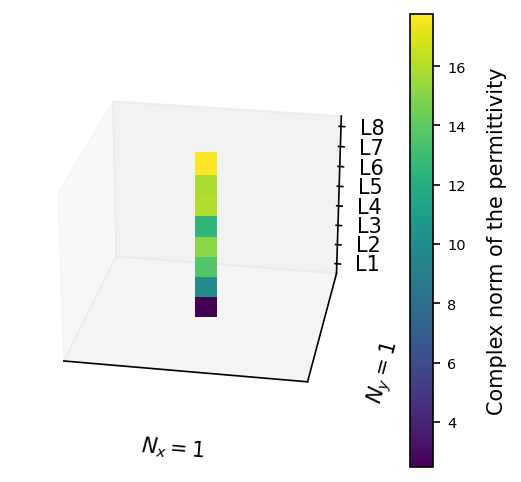

In [22]:
nidn.plot_model_grid(cfg)

#### Epsilon vs frequency and real materials

The following function plots the epsilon values vs. frequency of grid points against real materials in our library. This plot is in general more useful for patterned multilayers.

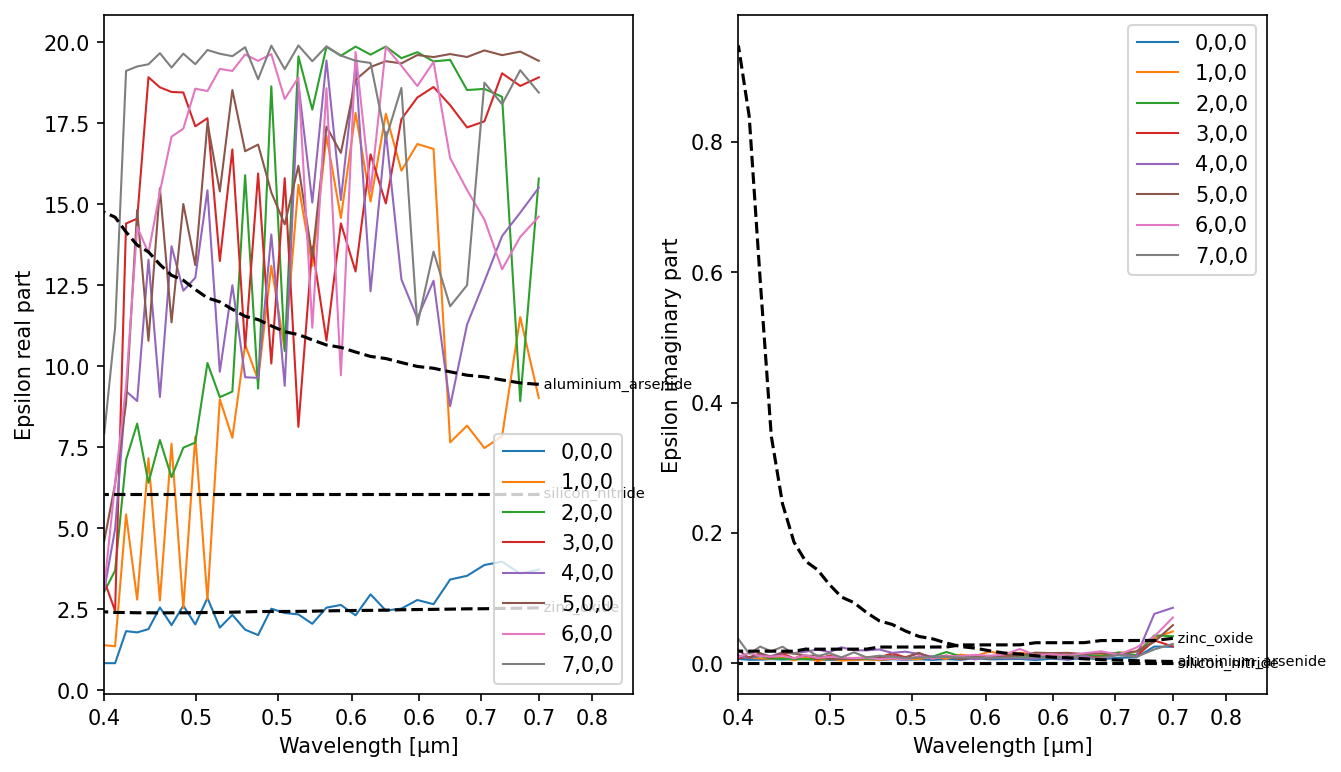

In [23]:
nidn.plot_eps_per_point(cfg)

In [24]:
cfg.pop("model",None); # Forget the old model

cfg.type = "classification" # Choose type as described above
cfg.iterations = 5000 # Set number of training iterations (that is forward model evaluations) to perform

In [25]:
nidn.run_training(cfg);

02:09:23|NIDN-INFO| ###  New Best=0.6452 with SpectrumLoss=0.6407 ### L1=0.6407
02:09:23|NIDN-INFO| It=0     Loss=0.6452   |  weighted_avg=0.6452  |  SpectrumLoss=0.6407 | L1=0.6407
02:09:24|NIDN-INFO| ###  New Best=0.6002 with SpectrumLoss=0.5957 ### L1=0.5957
02:09:24|NIDN-INFO| ###  New Best=0.5821 with SpectrumLoss=0.5776 ### L1=0.5776
02:09:25|NIDN-INFO| ###  New Best=0.5679 with SpectrumLoss=0.5633 ### L1=0.5633
02:09:26|NIDN-INFO| ###  New Best=0.5566 with SpectrumLoss=0.5522 ### L1=0.5522
02:09:26|NIDN-INFO| ###  New Best=0.5474 with SpectrumLoss=0.5431 ### L1=0.5431
02:09:26|NIDN-INFO| It=5     Loss=0.5474   |  weighted_avg=0.5832  |  SpectrumLoss=0.5431 | L1=0.5431
02:09:27|NIDN-INFO| ###  New Best=0.5400 with SpectrumLoss=0.5358 ### L1=0.5358
02:09:28|NIDN-INFO| ###  New Best=0.5373 with SpectrumLoss=0.5331 ### L1=0.5331
02:09:28|NIDN-INFO| ###  New Best=0.5360 with SpectrumLoss=0.5317 ### L1=0.5317
02:09:29|NIDN-INFO| ###  New Best=0.5325 with SpectrumLoss=0.5283 ### L1=0.5

02:10:07|NIDN-INFO| ###  New Best=0.1374 with SpectrumLoss=0.1361 ### L1=0.1361
02:10:08|NIDN-INFO| ###  New Best=0.1369 with SpectrumLoss=0.1356 ### L1=0.1356
02:10:09|NIDN-INFO| ###  New Best=0.1365 with SpectrumLoss=0.1352 ### L1=0.1352
02:10:10|NIDN-INFO| ###  New Best=0.1361 with SpectrumLoss=0.1348 ### L1=0.1348
02:10:10|NIDN-INFO| It=65    Loss=0.1361   |  weighted_avg=0.1451  |  SpectrumLoss=0.1348 | L1=0.1348
02:10:11|NIDN-INFO| ###  New Best=0.1358 with SpectrumLoss=0.1344 ### L1=0.1344
02:10:11|NIDN-INFO| ###  New Best=0.1355 with SpectrumLoss=0.1341 ### L1=0.1341
02:10:12|NIDN-INFO| ###  New Best=0.1352 with SpectrumLoss=0.1338 ### L1=0.1338
02:10:13|NIDN-INFO| ###  New Best=0.1350 with SpectrumLoss=0.1336 ### L1=0.1336
02:10:14|NIDN-INFO| ###  New Best=0.1348 with SpectrumLoss=0.1334 ### L1=0.1334
02:10:14|NIDN-INFO| It=70    Loss=0.1348   |  weighted_avg=0.1394  |  SpectrumLoss=0.1334 | L1=0.1334
02:10:15|NIDN-INFO| ###  New Best=0.1345 with SpectrumLoss=0.1332 ### L1=0.1

02:10:58|NIDN-INFO| ###  New Best=0.1156 with SpectrumLoss=0.1136 ### L1=0.1136
02:10:58|NIDN-INFO| It=125   Loss=0.1156   |  weighted_avg=0.1186  |  SpectrumLoss=0.1136 | L1=0.1136
02:10:59|NIDN-INFO| ###  New Best=0.1153 with SpectrumLoss=0.1134 ### L1=0.1134
02:11:00|NIDN-INFO| ###  New Best=0.1150 with SpectrumLoss=0.1131 ### L1=0.1131
02:11:01|NIDN-INFO| ###  New Best=0.1147 with SpectrumLoss=0.1129 ### L1=0.1129
02:11:01|NIDN-INFO| ###  New Best=0.1145 with SpectrumLoss=0.1127 ### L1=0.1127
02:11:02|NIDN-INFO| ###  New Best=0.1142 with SpectrumLoss=0.1124 ### L1=0.1124
02:11:02|NIDN-INFO| It=130   Loss=0.1142   |  weighted_avg=0.1170  |  SpectrumLoss=0.1124 | L1=0.1124
02:11:03|NIDN-INFO| ###  New Best=0.1140 with SpectrumLoss=0.1122 ### L1=0.1122
02:11:04|NIDN-INFO| ###  New Best=0.1138 with SpectrumLoss=0.1121 ### L1=0.1121
02:11:05|NIDN-INFO| ###  New Best=0.1136 with SpectrumLoss=0.1119 ### L1=0.1119
02:11:06|NIDN-INFO| ###  New Best=0.1135 with SpectrumLoss=0.1118 ### L1=0.1

02:11:46|NIDN-INFO| ###  New Best=0.1111 with SpectrumLoss=0.1095 ### L1=0.1095
02:11:47|NIDN-INFO| ###  New Best=0.1111 with SpectrumLoss=0.1095 ### L1=0.1095
02:11:48|NIDN-INFO| ###  New Best=0.1110 with SpectrumLoss=0.1095 ### L1=0.1095
02:11:49|NIDN-INFO| ###  New Best=0.1110 with SpectrumLoss=0.1095 ### L1=0.1095
02:11:49|NIDN-INFO| It=190   Loss=0.1110   |  weighted_avg=0.1112  |  SpectrumLoss=0.1095 | L1=0.1095
02:11:49|NIDN-INFO| ###  New Best=0.1110 with SpectrumLoss=0.1095 ### L1=0.1095
02:11:50|NIDN-INFO| ###  New Best=0.1110 with SpectrumLoss=0.1094 ### L1=0.1094
02:11:51|NIDN-INFO| ###  New Best=0.1110 with SpectrumLoss=0.1094 ### L1=0.1094
02:11:52|NIDN-INFO| ###  New Best=0.1109 with SpectrumLoss=0.1094 ### L1=0.1094
02:11:53|NIDN-INFO| ###  New Best=0.1109 with SpectrumLoss=0.1094 ### L1=0.1094
02:11:53|NIDN-INFO| It=195   Loss=0.1109   |  weighted_avg=0.1111  |  SpectrumLoss=0.1094 | L1=0.1094
02:11:53|NIDN-INFO| ###  New Best=0.1109 with SpectrumLoss=0.1094 ### L1=0.1

02:12:33|NIDN-INFO| ###  New Best=0.1046 with SpectrumLoss=0.1031 ### L1=0.1031
02:12:33|NIDN-INFO| It=250   Loss=0.1046   |  weighted_avg=0.1072  |  SpectrumLoss=0.1031 | L1=0.1031
02:12:34|NIDN-INFO| ###  New Best=0.1045 with SpectrumLoss=0.1030 ### L1=0.1030
02:12:34|NIDN-INFO| ###  New Best=0.1043 with SpectrumLoss=0.1028 ### L1=0.1028
02:12:35|NIDN-INFO| ###  New Best=0.1041 with SpectrumLoss=0.1026 ### L1=0.1026
02:12:36|NIDN-INFO| ###  New Best=0.1039 with SpectrumLoss=0.1024 ### L1=0.1024
02:12:37|NIDN-INFO| ###  New Best=0.1038 with SpectrumLoss=0.1023 ### L1=0.1023
02:12:37|NIDN-INFO| It=255   Loss=0.1038   |  weighted_avg=0.1059  |  SpectrumLoss=0.1023 | L1=0.1023
02:12:38|NIDN-INFO| ###  New Best=0.1036 with SpectrumLoss=0.1021 ### L1=0.1021
02:12:38|NIDN-INFO| ###  New Best=0.1035 with SpectrumLoss=0.1020 ### L1=0.1020
02:12:39|NIDN-INFO| ###  New Best=0.1034 with SpectrumLoss=0.1019 ### L1=0.1019
02:12:40|NIDN-INFO| ###  New Best=0.1032 with SpectrumLoss=0.1017 ### L1=0.1

02:13:19|NIDN-INFO| ###  New Best=0.0930 with SpectrumLoss=0.0916 ### L1=0.0916
02:13:20|NIDN-INFO| ###  New Best=0.0929 with SpectrumLoss=0.0915 ### L1=0.0915
02:13:21|NIDN-INFO| ###  New Best=0.0928 with SpectrumLoss=0.0914 ### L1=0.0914
02:13:22|NIDN-INFO| ###  New Best=0.0927 with SpectrumLoss=0.0913 ### L1=0.0913
02:13:22|NIDN-INFO| It=315   Loss=0.0927   |  weighted_avg=0.0940  |  SpectrumLoss=0.0913 | L1=0.0913
02:13:22|NIDN-INFO| ###  New Best=0.0926 with SpectrumLoss=0.0912 ### L1=0.0912
02:13:23|NIDN-INFO| ###  New Best=0.0925 with SpectrumLoss=0.0912 ### L1=0.0912
02:13:24|NIDN-INFO| ###  New Best=0.0924 with SpectrumLoss=0.0911 ### L1=0.0911
02:13:24|NIDN-INFO| ###  New Best=0.0923 with SpectrumLoss=0.0910 ### L1=0.0910
02:13:25|NIDN-INFO| ###  New Best=0.0922 with SpectrumLoss=0.0909 ### L1=0.0909
02:13:25|NIDN-INFO| It=320   Loss=0.0922   |  weighted_avg=0.0933  |  SpectrumLoss=0.0909 | L1=0.0909
02:13:26|NIDN-INFO| ###  New Best=0.0921 with SpectrumLoss=0.0908 ### L1=0.0

02:14:08|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:08|NIDN-INFO| It=375   Loss=0.0899   |  weighted_avg=0.0900  |  SpectrumLoss=0.0886 | L1=0.0886
02:14:09|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:10|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:11|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:12|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:13|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:13|NIDN-INFO| It=380   Loss=0.0899   |  weighted_avg=0.0900  |  SpectrumLoss=0.0886 | L1=0.0886
02:14:14|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:14|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:15|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0886
02:14:16|NIDN-INFO| ###  New Best=0.0899 with SpectrumLoss=0.0886 ### L1=0.0

02:15:02|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:02|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:03|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:04|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:04|NIDN-INFO| It=440   Loss=0.0897   |  weighted_avg=0.0897  |  SpectrumLoss=0.0884 | L1=0.0884
02:15:05|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:06|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:07|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:08|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:08|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0884
02:15:08|NIDN-INFO| It=445   Loss=0.0897   |  weighted_avg=0.0897  |  SpectrumLoss=0.0884 | L1=0.0884
02:15:09|NIDN-INFO| ###  New Best=0.0897 with SpectrumLoss=0.0884 ### L1=0.0

02:15:52|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:52|NIDN-INFO| It=500   Loss=0.0896   |  weighted_avg=0.0896  |  SpectrumLoss=0.0883 | L1=0.0883
02:15:53|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:53|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:54|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:55|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:56|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:56|NIDN-INFO| It=505   Loss=0.0896   |  weighted_avg=0.0896  |  SpectrumLoss=0.0883 | L1=0.0883
02:15:56|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:57|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:58|NIDN-INFO| ###  New Best=0.0896 with SpectrumLoss=0.0883 ### L1=0.0883
02:15:59|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0883 ### L1=0.0

02:16:40|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:41|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:42|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:43|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:43|NIDN-INFO| It=565   Loss=0.0895   |  weighted_avg=0.0895  |  SpectrumLoss=0.0882 | L1=0.0882
02:16:44|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:45|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:45|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:46|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:47|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0882
02:16:47|NIDN-INFO| It=570   Loss=0.0895   |  weighted_avg=0.0895  |  SpectrumLoss=0.0882 | L1=0.0882
02:16:48|NIDN-INFO| ###  New Best=0.0895 with SpectrumLoss=0.0882 ### L1=0.0

02:17:33|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:33|NIDN-INFO| It=625   Loss=0.0894   |  weighted_avg=0.0894  |  SpectrumLoss=0.0882 | L1=0.0882
02:17:34|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:35|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:36|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:37|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:38|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:38|NIDN-INFO| It=630   Loss=0.0894   |  weighted_avg=0.0894  |  SpectrumLoss=0.0882 | L1=0.0882
02:17:39|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:40|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:41|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0882
02:17:42|NIDN-INFO| ###  New Best=0.0894 with SpectrumLoss=0.0882 ### L1=0.0

02:18:26|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:26|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:27|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:28|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:28|NIDN-INFO| It=690   Loss=0.0893   |  weighted_avg=0.0893  |  SpectrumLoss=0.0881 | L1=0.0881
02:18:29|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:30|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:30|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:31|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:32|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0881
02:18:32|NIDN-INFO| It=695   Loss=0.0893   |  weighted_avg=0.0893  |  SpectrumLoss=0.0881 | L1=0.0881
02:18:33|NIDN-INFO| ###  New Best=0.0893 with SpectrumLoss=0.0881 ### L1=0.0

02:19:17|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:17|NIDN-INFO| It=750   Loss=0.0892   |  weighted_avg=0.0893  |  SpectrumLoss=0.0880 | L1=0.0880
02:19:18|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:19|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:20|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:20|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:21|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:21|NIDN-INFO| It=755   Loss=0.0892   |  weighted_avg=0.0892  |  SpectrumLoss=0.0880 | L1=0.0880
02:19:22|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:23|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:23|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0880
02:19:24|NIDN-INFO| ###  New Best=0.0892 with SpectrumLoss=0.0880 ### L1=0.0

02:20:07|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0874 ### L1=0.0874
02:20:08|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0873 ### L1=0.0873
02:20:09|NIDN-INFO| ###  New Best=0.0887 with SpectrumLoss=0.0873 ### L1=0.0873
02:20:10|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0872 ### L1=0.0872
02:20:10|NIDN-INFO| It=815   Loss=0.0886   |  weighted_avg=0.0889  |  SpectrumLoss=0.0872 | L1=0.0872
02:20:11|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0872 ### L1=0.0872
02:20:11|NIDN-INFO| ###  New Best=0.0885 with SpectrumLoss=0.0871 ### L1=0.0871
02:20:12|NIDN-INFO| ###  New Best=0.0884 with SpectrumLoss=0.0870 ### L1=0.0870
02:20:13|NIDN-INFO| ###  New Best=0.0883 with SpectrumLoss=0.0869 ### L1=0.0869
02:20:14|NIDN-INFO| ###  New Best=0.0882 with SpectrumLoss=0.0868 ### L1=0.0868
02:20:14|NIDN-INFO| It=820   Loss=0.0882   |  weighted_avg=0.0887  |  SpectrumLoss=0.0868 | L1=0.0868
02:20:15|NIDN-INFO| ###  New Best=0.0881 with SpectrumLoss=0.0867 ### L1=0.0

02:21:00|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:00|NIDN-INFO| It=875   Loss=0.0865   |  weighted_avg=0.0865  |  SpectrumLoss=0.0854 | L1=0.0854
02:21:01|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:01|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:02|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:03|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:04|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:04|NIDN-INFO| It=880   Loss=0.0865   |  weighted_avg=0.0865  |  SpectrumLoss=0.0854 | L1=0.0854
02:21:05|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:06|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:06|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:07|NIDN-INFO| ###  New Best=0.0865 with SpectrumLoss=0.0854 ### L1=0.0

02:21:52|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:53|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:53|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:54|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:54|NIDN-INFO| It=940   Loss=0.0864   |  weighted_avg=0.0864  |  SpectrumLoss=0.0854 | L1=0.0854
02:21:55|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:56|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:57|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:58|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:59|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0854
02:21:59|NIDN-INFO| It=945   Loss=0.0864   |  weighted_avg=0.0864  |  SpectrumLoss=0.0854 | L1=0.0854
02:21:59|NIDN-INFO| ###  New Best=0.0864 with SpectrumLoss=0.0854 ### L1=0.0

02:22:43|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:43|NIDN-INFO| It=1000  Loss=0.0863   |  weighted_avg=0.0863  |  SpectrumLoss=0.0853 | L1=0.0853
02:22:44|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:44|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:45|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:46|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:47|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:47|NIDN-INFO| It=1005  Loss=0.0863   |  weighted_avg=0.0863  |  SpectrumLoss=0.0853 | L1=0.0853
02:22:48|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:49|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:49|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:22:50|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0

02:23:33|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:33|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:34|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:35|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:35|NIDN-INFO| It=1065  Loss=0.0863   |  weighted_avg=0.0863  |  SpectrumLoss=0.0853 | L1=0.0853
02:23:35|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:36|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:37|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:38|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:38|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0853
02:23:38|NIDN-INFO| It=1070  Loss=0.0863   |  weighted_avg=0.0863  |  SpectrumLoss=0.0853 | L1=0.0853
02:23:39|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0853 ### L1=0.0

02:24:21|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:21|NIDN-INFO| It=1125  Loss=0.0863   |  weighted_avg=0.0863  |  SpectrumLoss=0.0852 | L1=0.0852
02:24:22|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:22|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:23|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:24|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:25|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:25|NIDN-INFO| It=1130  Loss=0.0863   |  weighted_avg=0.0863  |  SpectrumLoss=0.0852 | L1=0.0852
02:24:25|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:26|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:27|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0852
02:24:27|NIDN-INFO| ###  New Best=0.0863 with SpectrumLoss=0.0852 ### L1=0.0

02:25:11|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0852 ### L1=0.0852
02:25:12|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0852 ### L1=0.0852
02:25:13|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0852 ### L1=0.0852
02:25:14|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:25:14|NIDN-INFO| It=1190  Loss=0.0862   |  weighted_avg=0.0862  |  SpectrumLoss=0.0851 | L1=0.0851
02:25:14|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:25:15|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:25:16|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:25:17|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:25:18|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:25:18|NIDN-INFO| It=1195  Loss=0.0862   |  weighted_avg=0.0862  |  SpectrumLoss=0.0851 | L1=0.0851
02:25:19|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0

02:26:00|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:00|NIDN-INFO| It=1250  Loss=0.0862   |  weighted_avg=0.0862  |  SpectrumLoss=0.0851 | L1=0.0851
02:26:01|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:01|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:02|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:03|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:03|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:03|NIDN-INFO| It=1255  Loss=0.0862   |  weighted_avg=0.0862  |  SpectrumLoss=0.0851 | L1=0.0851
02:26:04|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:05|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:06|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:06|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0

02:26:45|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:46|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:46|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:47|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:47|NIDN-INFO| It=1315  Loss=0.0862   |  weighted_avg=0.0862  |  SpectrumLoss=0.0851 | L1=0.0851
02:26:48|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:49|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:50|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:50|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:51|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0851
02:26:51|NIDN-INFO| It=1320  Loss=0.0862   |  weighted_avg=0.0862  |  SpectrumLoss=0.0851 | L1=0.0851
02:26:52|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0851 ### L1=0.0

02:27:34|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:34|NIDN-INFO| It=1375  Loss=0.0862   |  weighted_avg=0.0862  |  SpectrumLoss=0.0850 | L1=0.0850
02:27:35|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:35|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:36|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:37|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:38|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:38|NIDN-INFO| It=1380  Loss=0.0862   |  weighted_avg=0.0862  |  SpectrumLoss=0.0850 | L1=0.0850
02:27:39|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:39|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:40|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0850
02:27:41|NIDN-INFO| ###  New Best=0.0862 with SpectrumLoss=0.0850 ### L1=0.0

02:28:24|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:25|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:26|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:27|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:27|NIDN-INFO| It=1440  Loss=0.0861   |  weighted_avg=0.0861  |  SpectrumLoss=0.0849 | L1=0.0849
02:28:27|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:28|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:29|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:30|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:31|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0849
02:28:31|NIDN-INFO| It=1445  Loss=0.0861   |  weighted_avg=0.0861  |  SpectrumLoss=0.0849 | L1=0.0849
02:28:32|NIDN-INFO| ###  New Best=0.0861 with SpectrumLoss=0.0849 ### L1=0.0

02:29:16|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:16|NIDN-INFO| It=1500  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0848 | L1=0.0848
02:29:17|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:18|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:19|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:20|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:21|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:21|NIDN-INFO| It=1505  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0848 | L1=0.0848
02:29:22|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:22|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:23|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:29:24|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0

02:30:09|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:09|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:10|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:11|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:11|NIDN-INFO| It=1565  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0848 | L1=0.0848
02:30:12|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:12|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:13|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:14|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:15|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0848
02:30:15|NIDN-INFO| It=1570  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0848 | L1=0.0848
02:30:15|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0848 ### L1=0.0

02:30:57|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:30:57|NIDN-INFO| It=1625  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0847 | L1=0.0847
02:30:58|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:30:58|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:30:59|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:00|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:01|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:01|NIDN-INFO| It=1630  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0847 | L1=0.0847
02:31:02|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:02|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:03|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:04|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0

02:31:46|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:46|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:47|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:48|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:48|NIDN-INFO| It=1690  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0847 | L1=0.0847
02:31:49|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:50|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:51|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:51|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:52|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:31:52|NIDN-INFO| It=1695  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0847 | L1=0.0847
02:31:53|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0

02:32:38|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:38|NIDN-INFO| It=1750  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0847 | L1=0.0847
02:32:39|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:40|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:40|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:41|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:42|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:42|NIDN-INFO| It=1755  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0847 | L1=0.0847
02:32:42|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:43|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:44|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:32:45|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0

02:33:41|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:43|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:44|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:45|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:45|NIDN-INFO| It=1815  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0847 | L1=0.0847
02:33:47|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:48|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:49|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:51|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:52|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0847
02:33:52|NIDN-INFO| It=1820  Loss=0.0860   |  weighted_avg=0.0860  |  SpectrumLoss=0.0847 | L1=0.0847
02:33:53|NIDN-INFO| ###  New Best=0.0860 with SpectrumLoss=0.0847 ### L1=0.0

02:35:08|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:08|NIDN-INFO| It=1875  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:35:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:12|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:14|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:15|NIDN-INFO| It=1880  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:35:16|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:18|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:35:20|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:36:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:40|NIDN-INFO| It=1940  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:36:41|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:36:47|NIDN-INFO| It=1945  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:36:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:38:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:06|NIDN-INFO| It=2000  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:38:07|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:12|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:13|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:13|NIDN-INFO| It=2005  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:38:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:16|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:18|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:38:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:39:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:39|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:41|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:42|NIDN-INFO| It=2065  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:39:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:39:49|NIDN-INFO| It=2070  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:39:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:41:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:04|NIDN-INFO| It=2125  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:41:05|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:08|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:10|NIDN-INFO| It=2130  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:41:11|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:13|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:14|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:41:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:42:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:16|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:17|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:18|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:18|NIDN-INFO| It=2190  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:42:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:20|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:22|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:23|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:42:23|NIDN-INFO| It=2195  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:42:24|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:43:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:32|NIDN-INFO| It=2250  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:43:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:39|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:39|NIDN-INFO| It=2255  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:43:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:41|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:43:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:44:55|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:44:56|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:44:58|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:44:59|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:44:59|NIDN-INFO| It=2315  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:45:00|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:45:01|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:45:02|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:45:03|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:45:05|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:45:05|NIDN-INFO| It=2320  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:45:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:46:03|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:03|NIDN-INFO| It=2375  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:46:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:05|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:07|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:08|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:08|NIDN-INFO| It=2380  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:46:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:46:11|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:47:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:07|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:08|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:09|NIDN-INFO| It=2440  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:47:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:11|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:12|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:14|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:47:15|NIDN-INFO| It=2445  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:47:16|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:48:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:15|NIDN-INFO| It=2500  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:48:17|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:18|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:20|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:21|NIDN-INFO| It=2505  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:48:22|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:23|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:24|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:48:25|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:49:25|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:26|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:27|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:28|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:28|NIDN-INFO| It=2565  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:49:29|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:30|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:31|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:49:33|NIDN-INFO| It=2570  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:49:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:50:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:32|NIDN-INFO| It=2625  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:50:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:38|NIDN-INFO| It=2630  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:50:39|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:41|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:50:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:51:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:39|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:39|NIDN-INFO| It=2690  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:51:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:51:45|NIDN-INFO| It=2695  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:51:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:52:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:42|NIDN-INFO| It=2750  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:52:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:48|NIDN-INFO| It=2755  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:52:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:51|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:52:52|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0

02:53:41|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:44|NIDN-INFO| It=2815  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:53:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0847 ### L1=0.0847
02:53:49|NIDN-INFO| It=2820  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0847 | L1=0.0847
02:53:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

02:54:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:38|NIDN-INFO| It=2875  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:54:39|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:41|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:42|NIDN-INFO| It=2880  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:54:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:54:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

02:55:29|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:30|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:31|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:32|NIDN-INFO| It=2940  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:55:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:55:37|NIDN-INFO| It=2945  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:55:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

02:56:29|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:29|NIDN-INFO| It=3000  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:56:30|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:31|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:34|NIDN-INFO| It=3005  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:56:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:56:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

02:57:30|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:31|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:33|NIDN-INFO| It=3065  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:57:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:57:37|NIDN-INFO| It=3070  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:57:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

02:58:26|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:26|NIDN-INFO| It=3125  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:58:27|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:28|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:29|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:29|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:30|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:30|NIDN-INFO| It=3130  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:58:31|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:58:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

02:59:20|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:22|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:22|NIDN-INFO| It=3190  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:59:23|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:24|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:25|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:26|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:27|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
02:59:27|NIDN-INFO| It=3195  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
02:59:28|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:00:14|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:14|NIDN-INFO| It=3250  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:00:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:16|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:17|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:18|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:18|NIDN-INFO| It=3255  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:00:18|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:20|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:00:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:01:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:05|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:07|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:07|NIDN-INFO| It=3315  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:01:08|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:11|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:11|NIDN-INFO| It=3320  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:01:12|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:01:57|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:57|NIDN-INFO| It=3375  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:01:58|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:01:59|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:00|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:01|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:02|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:02|NIDN-INFO| It=3380  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:02:03|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:05|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:05|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:02:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:45|NIDN-INFO| It=3440  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:02:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:02:49|NIDN-INFO| It=3445  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:02:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:03:31|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:31|NIDN-INFO| It=3500  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:03:31|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:35|NIDN-INFO| It=3505  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:03:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:03:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:04:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:22|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:23|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:23|NIDN-INFO| It=3565  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:04:24|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:25|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:26|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:27|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:27|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:04:27|NIDN-INFO| It=3570  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:04:28|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:05:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:06|NIDN-INFO| It=3625  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:05:07|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:08|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:11|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:11|NIDN-INFO| It=3630  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:05:12|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:13|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:13|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:14|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:05:55|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:56|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:57|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:58|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:05:58|NIDN-INFO| It=3690  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:05:59|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:00|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:01|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:02|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:02|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:02|NIDN-INFO| It=3695  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:06:03|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:06:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:44|NIDN-INFO| It=3750  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:06:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:48|NIDN-INFO| It=3755  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:06:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:06:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:07:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:34|NIDN-INFO| It=3815  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:07:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:39|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:07:39|NIDN-INFO| It=3820  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:07:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:08:23|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:23|NIDN-INFO| It=3875  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:08:24|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:24|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:25|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:26|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:27|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:27|NIDN-INFO| It=3880  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:08:28|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:29|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:29|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:08:30|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:09:13|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:14|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:16|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:16|NIDN-INFO| It=3940  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:09:17|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:18|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:20|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:09:20|NIDN-INFO| It=3945  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:09:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:16:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:43|NIDN-INFO| It=4000  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:16:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:47|NIDN-INFO| It=4005  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:16:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:16:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

03:17:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:38|NIDN-INFO| It=4065  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:17:39|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:41|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:42|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:43|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
03:17:43|NIDN-INFO| It=4070  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
03:17:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:44:57|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:44:57|NIDN-INFO| It=4125  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:44:57|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:44:58|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:44:59|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:00|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:01|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:01|NIDN-INFO| It=4130  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:45:01|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:02|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:03|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:45:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:51|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:51|NIDN-INFO| It=4190  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:45:52|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:52|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:53|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:54|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:55|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:45:55|NIDN-INFO| It=4195  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:45:55|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:46:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:44|NIDN-INFO| It=4250  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:46:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:48|NIDN-INFO| It=4255  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:46:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:51|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:46:51|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

Epoch  4278: reducing learning rate of group 0 to 5.2800e-05.


06:47:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:07|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:08|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:08|NIDN-INFO| It=4280  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:47:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:11|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:12|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:12|NIDN-INFO| It=4285  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:47:12|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:13|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:47:57|NIDN-INFO| It=4340  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:47:58|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:58|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:47:59|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:00|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:01|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:01|NIDN-INFO| It=4345  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:48:01|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:02|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:03|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:48:44|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:45|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:46|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:46|NIDN-INFO| It=4405  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:48:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:47|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:48|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:49|NIDN-INFO| It=4410  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:48:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:48:51|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:49:29|NIDN-INFO| It=4465  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:49:30|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:31|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:32|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:33|NIDN-INFO| It=4470  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:49:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:49:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:50:16|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:17|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:18|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:18|NIDN-INFO| It=4530  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:50:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:19|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:20|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:21|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:22|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:22|NIDN-INFO| It=4535  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:50:23|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:50:23|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:51:06|NIDN-INFO| It=4590  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:51:07|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:08|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:09|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:10|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:10|NIDN-INFO| It=4595  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:51:11|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:12|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:13|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:14|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:51:15|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:51:59|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:00|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:01|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:01|NIDN-INFO| It=4655  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:52:02|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:03|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:04|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:05|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:05|NIDN-INFO| It=4660  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:52:06|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:07|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:52:49|NIDN-INFO| It=4715  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:52:49|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:50|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:51|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:52|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:52|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:52|NIDN-INFO| It=4720  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:52:53|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:54|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:54|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:55|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:52:56|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

06:53:33|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:34|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:35|NIDN-INFO| It=4780  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:53:35|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:36|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:37|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:38|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:38|NIDN-INFO| It=4785  Loss=0.0859   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:53:39|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0846
06:53:40|NIDN-INFO| ###  New Best=0.0859 with SpectrumLoss=0.0846 ### L1=0.0

Epoch  4837: reducing learning rate of group 0 to 3.4848e-05.


06:54:14|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:15|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:15|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:16|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:16|NIDN-INFO| It=4840  Loss=0.0858   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:54:17|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:17|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:18|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:19|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:19|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:19|NIDN-INFO| It=4845  Loss=0.0858   |  weighted_avg=0.0859  |  SpectrumLoss=0.0846 | L1=0.0846
06:54:20|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0

06:54:59|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:54:59|NIDN-INFO| It=4900  Loss=0.0858   |  weighted_avg=0.0858  |  SpectrumLoss=0.0846 | L1=0.0846
06:54:59|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:00|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:01|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:01|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:02|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:02|NIDN-INFO| It=4905  Loss=0.0858   |  weighted_avg=0.0858  |  SpectrumLoss=0.0846 | L1=0.0846
06:55:03|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:03|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:04|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:05|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0

06:55:44|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:45|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:45|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:46|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:46|NIDN-INFO| It=4965  Loss=0.0858   |  weighted_avg=0.0858  |  SpectrumLoss=0.0846 | L1=0.0846
06:55:47|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:48|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:48|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:49|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:50|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0846
06:55:50|NIDN-INFO| It=4970  Loss=0.0858   |  weighted_avg=0.0858  |  SpectrumLoss=0.0846 | L1=0.0846
06:55:51|NIDN-INFO| ###  New Best=0.0858 with SpectrumLoss=0.0846 ### L1=0.0

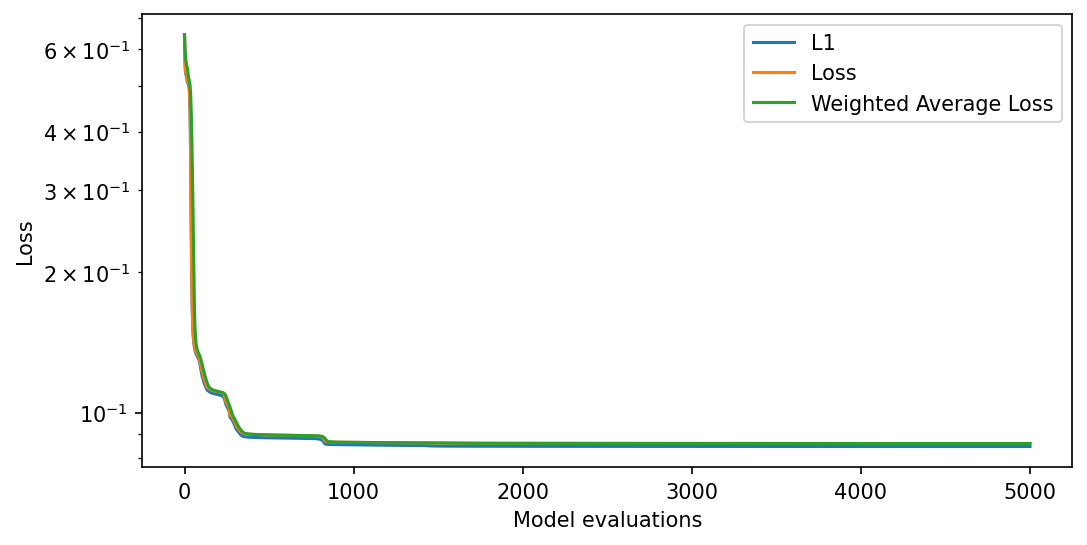

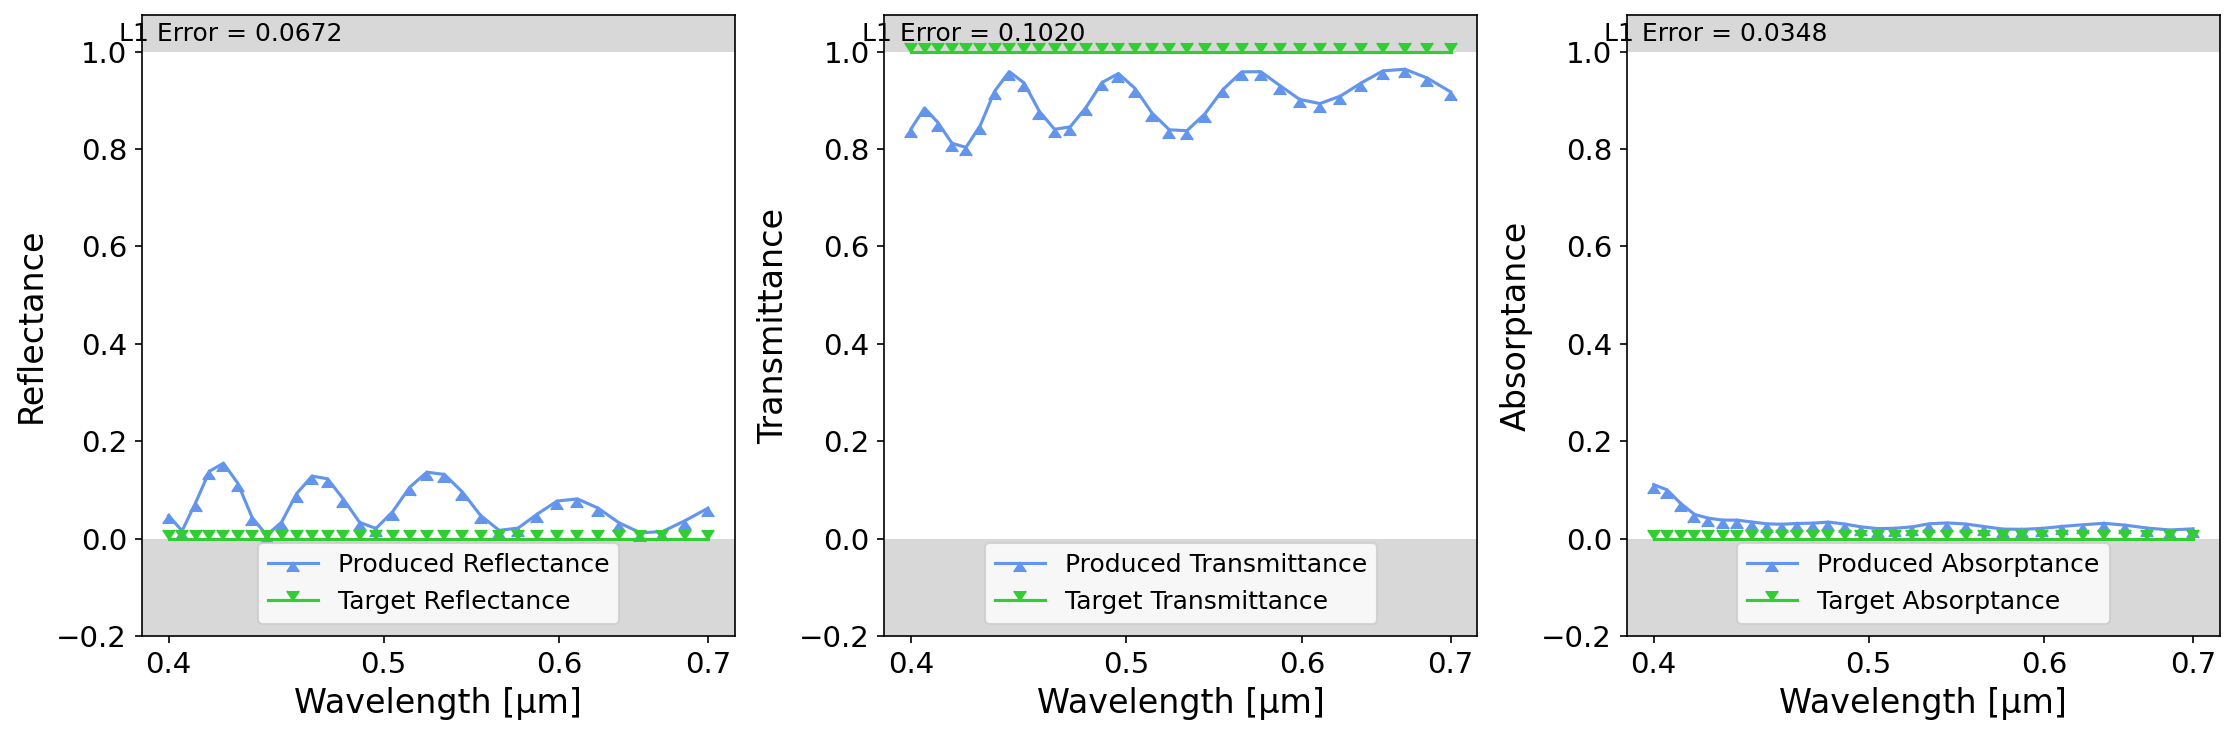

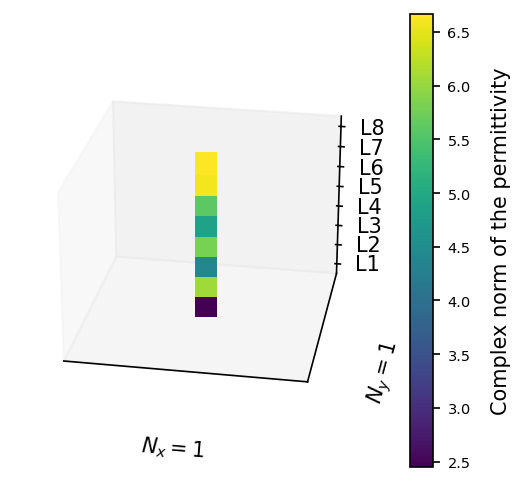

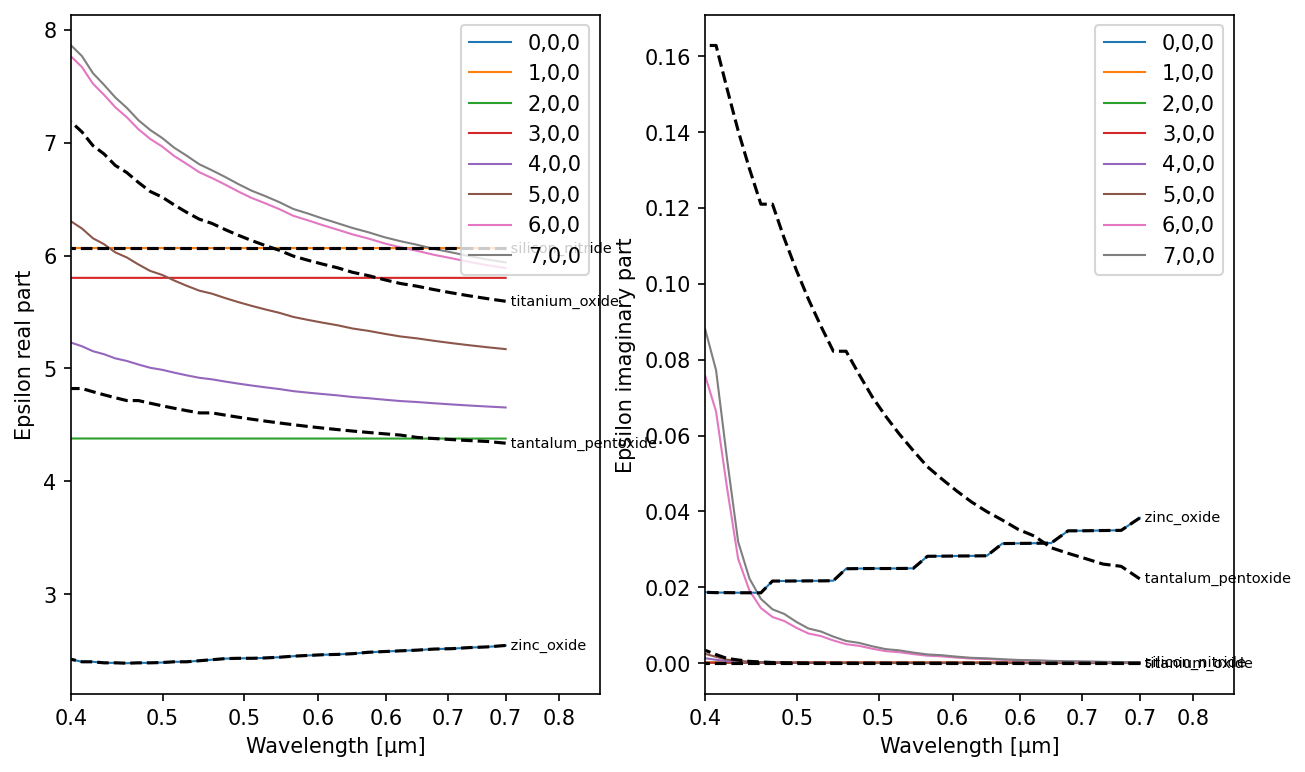

In [26]:
nidn.plot_losses(cfg)
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_eps_per_point(cfg)

NB Here we should have plotted the RTA result of this structure.
In case you want to save results you can use this handy function to save it to the results folder with a current timestamp.

In [ ]:
nidn.save_run(cfg)

# You can save all available plots to a single folder using this function
nidn.save_all_plots(cfg,save_path="/results/example/")